In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt


(-0.5649830299151682,
 1.5765768038912429,
 -0.6682999717795821,
 1.5560812876038745)

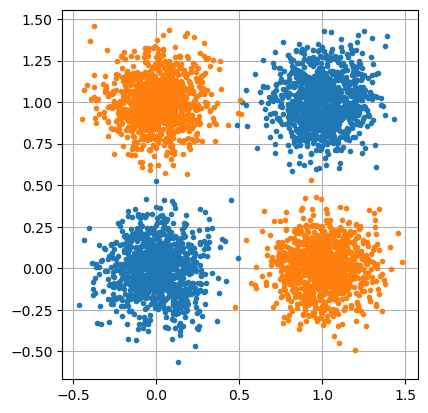

In [2]:
#data creation
s=0.15
x00=rd.randn(2,1000)*s
x10=rd.randn(2,1000)*s
x10[0,:]=x10[0,:]+1
x01=rd.randn(2,1000)*s
x01[1,:]=x01[1,:]+1
x11=rd.randn(2,1000)*s+1

x0=np.hstack((x00,x11))
x1=np.hstack((x10,x01))

plt.plot(x0[0,:],x0[1,:],'.')
plt.plot(x1[0,:],x1[1,:],'.')
plt.grid(True)
plt.axis('scaled')

In [3]:
X=np.hstack((x0,x1))
print(X.shape)
y=np.hstack((np.zeros(2000),np.ones(2000)))*2-1
print(y.shape)

(2, 4000)
(4000,)


In [7]:
# Inputs: H, X, y, alpha, iter, eta
# Outputs: Wi, b, Wo, bo, Error
H=5
Wi=rd.randn(2,H)*.1
b=np.zeros((H,1))
Wo=rd.randn(H,1)*.1
bo=0

dzWi=np.zeros(Wi.shape)
dzb=np.zeros(b.shape)
dzWo=np.zeros(Wo.shape)
dzbo=0

alpha=0.9
iter=1500
eta=1e-5

Error=np.zeros(iter)

for n in range(iter):
    #forward pass
    u=np.dot(Wi.T,X)+b
    v=np.tanh(u)
    z=np.dot(Wo.T,v)+bo
    yh=np.tanh(z)
    
    #error 
    E=y-yh
    Error[n]=np.mean(E**2)
    
    #gradient
    dz=-2*E*(1-yh**2)
    dbo=np.sum(dz)
    dWo=np.dot(v,dz.T)
    du=(1-v**2)*np.dot(Wo,dz)
    db=np.sum(du,axis=1)
    dWi=np.dot(X,du.T)
    
    #adapt
    dzWi=alpha*dzWi+dWi
    dzb=alpha*dzb+db[:,np.newaxis]
    dzWo=alpha*dzWo+dWo
    dzbo=alpha*dzbo+dbo
    
    Wi=Wi-eta*dzWi
    b=b-eta*dzb
    Wo=Wo-eta*dzWo
    bo=bo-eta*dzbo
    
    # print('Error: ',Error[n])
    # print('Wi: ',Wi)

Error:  1.0040925924867101
Error:  1.0037743351682504
Error:  1.0032681668927057
Error:  1.0027386552689395
Error:  1.002322317708106
Error:  1.002087176522722
Error:  1.0020239761335517
Error:  1.0020657430174442
Error:  1.002123011431688
Error:  1.002119291343204
Error:  1.002014719902183
Error:  1.0018125340626538
Error:  1.0015498537181178
Error:  1.0012790347453373
Error:  1.001047596272659
Error:  1.0008835883587144
Error:  1.000790153588508
Error:  1.000749287831364
Error:  1.0007317652026286
Error:  1.0007087550134781
Error:  1.0006610006040015
Error:  1.0005830680606669
Error:  1.0004822828913993
Error:  1.0003737633847467
Error:  1.0002739266726386
Error:  1.0001948558325164
Error:  1.0001411656500208
Error:  1.0001098804027688
Error:  1.0000927703253364
Error:  1.0000799145970647
Error:  1.0000631093177677
Error:  1.000038061428743
Error:  1.0000049059879537
Error:  0.9999672097343114
Error:  0.9999300744600073
Error:  0.9998981213952512
Error:  0.9998740245756376
Error:  0.

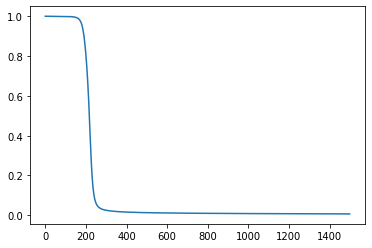

In [8]:
plt.plot(Error)

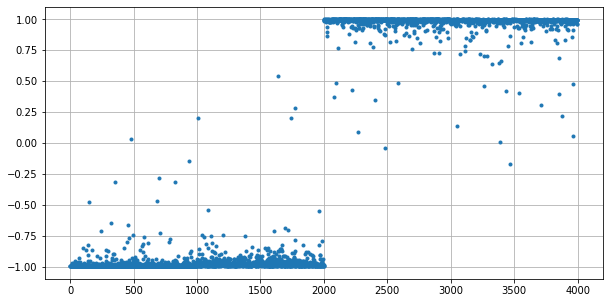

In [9]:
plt.figure(figsize=(10,5))
plt.plot(yh.squeeze(),'.')
plt.grid(True)

Nº de erros: 7


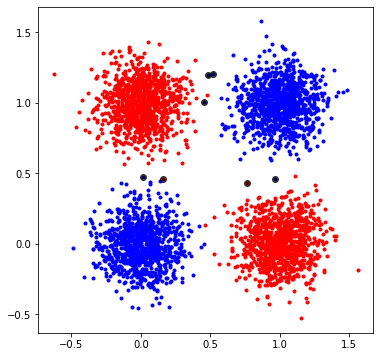

In [10]:
plt.figure(figsize=(6,6))
ye=(yh.squeeze()>=0)*2-1
plt.plot(X[0,y==-1],X[1,y==-1],'.b')
plt.plot(X[0,y==1],X[1,y==1],'.r')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.7)
print('Nº de erros:',np.sum(y!=ye))


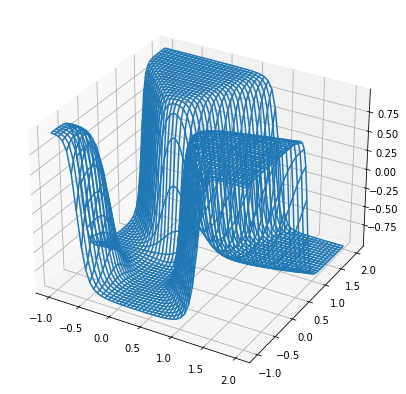

In [11]:
gX,gY=np.meshgrid(np.linspace(-1,2,50),np.linspace(-1,2,50))
X2=np.vstack((gX.ravel(),gY.ravel()))
u=np.dot(Wi.T,X2)+b
v=np.tanh(u)
z=np.dot(Wo.T,v)
yh=np.tanh(z+bo)
Yh=np.reshape(yh,(50,50))

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
#ax.contour3D(gX,gY,Yh,50,cmap='binary')
ax.plot_wireframe(gX,gY,Yh)

In [ ]:
import numpy as np
import numpy.random as rd

# tamanho da camada escondida
H = 5

# inicialização dos parâmetros do modelo
Wi1 = rd.randn(2, H) * .1
b1 = np.zeros((H, 1))
Wi2 = rd.randn(H, H) * .1
b2 = np.zeros((H, 1))
Wo = rd.randn(H, 1) * .1
bo = 0

# inicialização dos gradientes acumulados do momento
dzWi1 = np.zeros(Wi1.shape)
dzb1 = np.zeros(b1.shape)
dzWi2 = np.zeros(Wi2.shape)
dzb2 = np.zeros(b2.shape)
dzWo = np.zeros(Wo.shape)
dzbo = 0

# hiperparâmetros do modelo
alpha = 0.9
iter = 1500
eta = 1e-5

# vetor de erro da rede neural
Error = np.zeros(iter)

for n in range(iter):
    #forward pass
    u1 = np.dot(Wi1.T, X) + b1
    v1 = np.tanh(u1)
    u2 = np.dot(Wi2.T, v1) + b2
    v2 = np.tanh(u2)
    z = np.dot(Wo.T, v2) + bo
    yh = np.tanh(z)
    
    #error 
    E = y - yh
    Error[n] = np.mean(E**2)
    
    #gradient
    dz = -2 * E * (1 - yh**2)
    dbo = np.sum(dz)
    dWo = np.dot(v2, dz.T)
    du2 = (1 - v2**2) * np.dot(Wo, dz)
    db2 = np.sum(du2, axis=1)
    dWi2 = np.dot(v1, du2.T)
    du1 = (1 - v1**2) * np.dot(Wi2, du2)
    db1 = np.sum(du1, axis=1)
    dWi1 = np.dot(X, du1.T)
    
